In [2]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
import serial
from matplotlib import cm
import subprocess


11146
8000


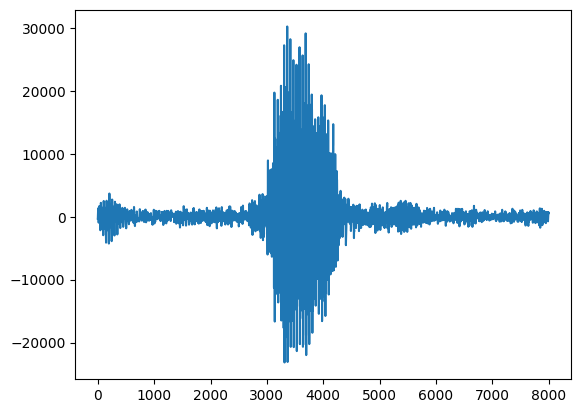

In [16]:
# Dataset path and view possible targets
# filename  = '../data_speech_commands_v0.02/four/0a2b400e_nohash_0.wav'  #Four
# filename  = '../data_speech_commands_v0.02/right/0a2b400e_nohash_3.wav' #Right
# filename  = '../data_speech_commands_v0.02/stop/0a196374_nohash_0.wav'  #Stop
filename  = '../my_eight.wav'  #Eight

signal, fs = librosa.load(filename, sr=8000)
signal=signal*(2**15)
print(len(signal))
signal = signal[0:8000]
print(len(signal))
function=signal.astype(np.int16)
np.savetxt('time_series_1s.dat', function, fmt='%d', delimiter='\n')


plt.plot(signal)

In [6]:
subprocess.run("cd ../ ; pio run -t upload", shell=True)

ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/cu.usbserial-14110'
ser.open()

for i in range(20):            # 256 = 16*16
    b = ser.readline()          # read a byte string
    str_rn = b.decode()
    str_input = str_rn.rstrip()
    print(f"{i}  : {str_input}")
    if str_input == "Setup done":
        break

ser.close()

********************************************************************************
Obsolete PIO Core v6.1.7 is used (previous was 6.1.9)
Please remove multiple PIO Cores from a system:
https://docs.platformio.org/en/latest/core/installation/troubleshooting.html
********************************************************************************
Processing featheresp32 (platform: espressif32; board: featheresp32; framework: arduino)
--------------------------------------------------------------------------------
Verbose mode can be enabled via `-v, --verbose` option
CONFIGURATION: https://docs.platformio.org/page/boards/espressif32/featheresp32.html
PLATFORM: Espressif 32 (6.3.1) > Adafruit ESP32 Feather
HARDWARE: ESP32 240MHz, 320KB RAM, 4MB Flash
DEBUG: Current (cmsis-dap) External (cmsis-dap, esp-bridge, esp-prog, iot-bus-jtag, jlink, minimodule, olimex-arm-usb-ocd, olimex-arm-usb-ocd-h, olimex-arm-usb-tiny-h, olimex-jtag-tiny, tumpa)
PACKAGES: 
 - framework-arduinoespressif32 @ 3.20009.0 

In [17]:
a= function
a= a.astype(np.int16)
# a= a.astype(np.int32)


ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/cu.usbserial-14110'
ser.open()

for i in range(len(a)):
    values = str(a[i])
    send=bytearray(values, encoding='utf8')
    jumpline=bytearray('\n', encoding='utf8')
    ser.write(send)
    ser.write(jumpline)
    # print(f"send   [{i}]  : {send}")
    
data = []                       # empty list to store the data
for i in range(256):            # 256 = 16*16
    b = ser.readline()          # read a byte string
    str_rn = b.decode()
    str_input = str_rn.rstrip()
    data.append(str_input)
    print(f"{i}  : {str_input}")
    
    
mfcc=np.array(data)
# mfcc=mfcc.astype(np.int16)
mfcc=mfcc.astype(np.float16)

    


ser.close()
print(len(mfcc))

0  : 111.90
1  : 11.06
2  : 2.22
3  : 0.59
4  : -2.54
5  : -2.32
6  : -0.82
7  : -0.74
8  : 0.92
9  : -0.95
10  : 0.37
11  : -0.28
12  : 0.01
13  : 0.43
14  : 0.07
15  : 0.39
16  : 116.99
17  : 10.88
18  : 1.03
19  : 1.64
20  : -1.92
21  : -1.28
22  : -1.22
23  : -0.41
24  : 0.95
25  : -0.86
26  : 0.31
27  : -0.01
28  : -0.21
29  : 0.73
30  : 0.05
31  : 0.31
32  : 113.33
33  : 8.76
34  : 0.34
35  : 1.39
36  : -0.34
37  : -0.27
38  : -0.68
39  : 0.19
40  : 1.14
41  : -0.71
42  : 0.01
43  : -0.31
44  : 0.10
45  : 0.21
46  : -0.52
47  : 0.06
48  : 115.79
49  : 7.33
50  : 1.24
51  : 0.78
52  : -1.28
53  : -0.08
54  : -1.25
55  : 0.05
56  : 1.25
57  : -0.72
58  : -0.33
59  : -0.25
60  : 0.84
61  : 0.29
62  : -0.31
63  : 0.17
64  : 119.77
65  : 4.85
66  : 2.42
67  : -0.16
68  : -0.56
69  : 0.62
70  : -0.84
71  : 0.52
72  : 0.98
73  : -0.51
74  : -0.28
75  : -0.21
76  : 0.66
77  : -0.46
78  : 0.16
79  : -0.00
80  : 120.28
81  : 4.13
82  : 0.93
83  : -1.76
84  : -1.00
85  : -0.78
86  : -0.98
8

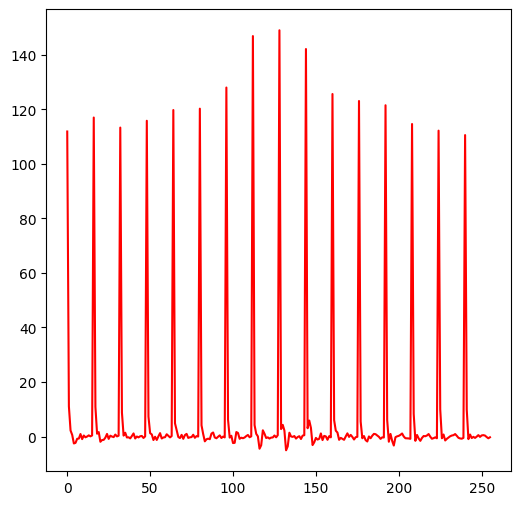

<Figure size 600x600 with 0 Axes>

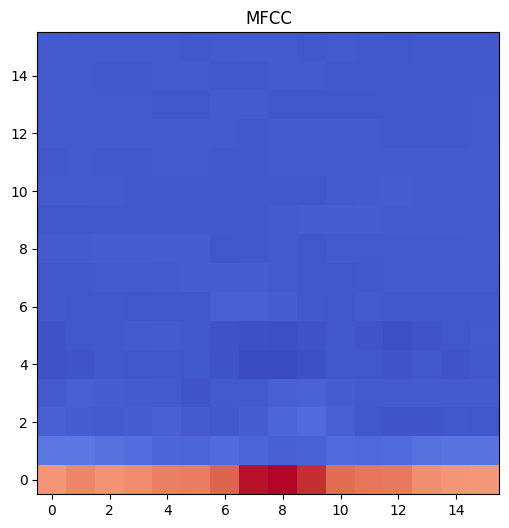

In [18]:
%matplotlib inline


plt.figure(figsize=(6,6))
plt.plot(mfcc,'r')
plt.show()

mfcc_from_time_series = mfcc.reshape(16,16)
# print(mfcc_from_time_series.shape)

plt.figure(figsize=(6,6))
fig, ax = plt.subplots(figsize=(6,6))
mfcc_from_time_series= np.swapaxes(mfcc_from_time_series, 0 ,1)
cax = ax.imshow(mfcc_from_time_series, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()


In [9]:
#Change -DFFTXXXX to the desired FFT size
subprocess.run('g++ -Dcomputer compute_mfcc.cpp -o compute_mfcc' , shell=True)  
subprocess.run(["./compute_mfcc"], shell=True)

CompletedProcess(args=['./compute_mfcc'], returncode=0)

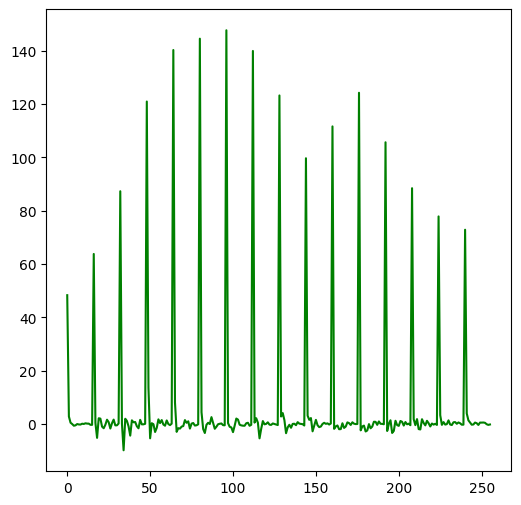

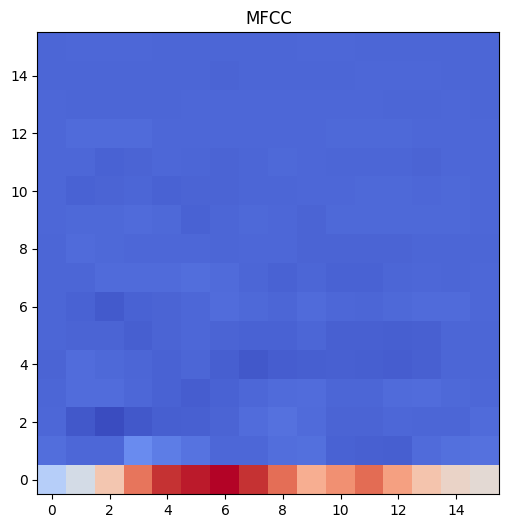

In [11]:

mfcc_from_time_series = np.genfromtxt('mfcc_from_time_series_1s.dat',delimiter='\n',dtype=None)

%matplotlib inline


plt.figure(figsize=(6,6))
plt.plot(mfcc_from_time_series,'g')
# plt.plot(mfcc,'r')

mfcc_from_time_series = mfcc_from_time_series.reshape(16,16)
fig, ax = plt.subplots(figsize=(6,6))
mfcc_from_time_series= np.swapaxes(mfcc_from_time_series, 0 ,1)
cax = ax.imshow(mfcc_from_time_series, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()